In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [252]:
# -*- coding: utf-8 -*-
import os 
import sys
sys.path.insert(0, os.getcwd())

from model import predict,get_model
# import keys_union
from glob import glob
from PIL import Image
import time
import matplotlib.pyplot as plt
import difflib
import re
import random
%matplotlib inline
paths = glob('./test/*.*')


In [3]:
# sys.path.insert(1, '/mnt/wuwenhui/git_ocr_project/keras_crnn/train/keras-train/')
import keys_keras
with open('../train/create_dataset/medicine_v2.txt') as f:
    medicine = f.readlines()
medicine = [name.split('\n')[0] for name in medicine]
medicine = list(set(medicine))


In [1218]:
from model import predict,get_model
# characters = keys_keras.alphabet[:]
characters = keys_keras.alphabet_union[:]
print(characters[1230:1240])
height = 32
nclass=len(characters)+1
% time model,baseModel = get_model(height,nclass)

墒沮雨叁缥悴藐湫娟苑
CPU times: user 12.2 s, sys: 21.2 s, total: 33.4 s
Wall time: 1.81 s


CPU times: user 76.8 ms, sys: 30.3 ms, total: 107 ms
Wall time: 77.5 ms
CPU times: user 196 ms, sys: 0 ns, total: 196 ms
Wall time: 164 ms


'（甲）0.g彩氯化钠（山东齐都）※（甲）0.9影氯化钠线袋        '

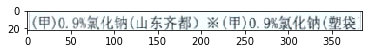

In [1222]:
# from model import predict 
import time
# img_path = '../train/data/generate_medicine_images/"氨甲苯酸氯化钠-20.png'
img_path = glob('/mnt/wuwenhui/git_ocr_project/keras_crnn/train/data/manual_crop/zh/*png')

img = Image.open(random.choice(img_path))
%time baseModel.load_weights('../model/gru_model__003996.h5')
%time text0 = predict(img,baseModel)
# text0 = difflib.get_close_matches(text0,possibilities=medicine,n=3)
# %time baseModel.load_weights('../model/my_model_keras.h5')
# %time text = predict(img,baseModel)
# text = difflib.get_close_matches(text,possibilities=medicine,n=1)
plt.imshow(img)
text0

'（甲）0.g导氯化钠(山东齐都）（甲）0.9第象化钠（（袋       '

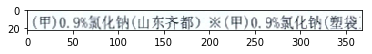

In [729]:
plt.imshow(img)
text0

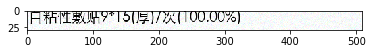

In [1064]:
# valid_data = glob('../train/data/train_competition_gen_25_v2/*.png')
img = Image.open(random.choice(valid_data))
plt.imshow(img)

In [ ]:
import keys_keras
characters = keys_keras.alphabet_[:]
height = 32
nclass=len(characters)+1
% time model,baseModel = get_model(height,nclass)
img_path = '/mnt/wuwenhui/git_ocr_project/keras_crnn/train/data/valid_v3_replace/#卡培他滨(艾滨)片-20.png'
img = Image.open(img_path)
%time baseModel.load_weights('../save_model/model_v3_small.h5')
%time text0 = predict(img,baseModel)
plt.imshow(img)
text0

In [ ]:
import keys_keras
characters = keys_keras.alphabet[:]
sum_000045 = 0 
error_list_000045 = []
height = 32
nclass=len(characters)+1
% time model,baseModel = get_model(height,nclass)
baseModel.load_weights('../save_model/model_v3_small.h5')
for item in valid_data:
    img = Image.open(item)
#     print(img.size)
    text0 = predict(img,baseModel)
#     result = difflib.get_close_matches(text0,possibilities=medicine,n=3)
#     if not result and text0 :
#         result = text0
#     elif not result and not text0:
#         continue
    ground_true = item.split('/')[-1].split('.')[0]
    print(ground_true,text0)
#     result = result[0]
    if text0 == ground_true:
        sum_000045+=1
#     else: 
#         error_list_000045.append((ground_true,text0,result[0]))
        

In [ ]:
sum_000045/len(valid_data)


In [ ]:
sum_origin = 0 
error_list_origin = []
baseModel.load_weights('../model/my_model_keras.h5')
for item in valid_data:
    img = Image.open(item)
    text0 = predict(img,baseModel)
    result = difflib.get_close_matches(text0,possibilities=medicine,n=3)
    if not result and text0 :
        result = text0
    elif not result and not text0:
        continue
    ground_true = item.split('/')[-1].split('.')[0]
#     print(ground_true,text0)
    if result[0] == ground_true:
        sum_origin+=1
    else: 
        error_list_origin.append((ground_true,text0,result[0]))
print(sum_origin/len(valid_data))

In [ ]:
import cv2
import sys
import os
sys.path.append('/mnt/wuwenhui/git_ocr_project/keras_crnn/pytorch_crnn/')
from crnn_lib import CRNNLib

image_path = '/mnt/wuwenhui/git_ocr_project/keras_crnn/train/data/generate_medicine/Kell血型抗原鉴定.png'
recognizer = CRNNLib()

sum_origin = 0 
error_list_origin = []

for item in valid_data:
    image = cv2.imread(item)
    text0 = recognizer.recognize(image)
    result = difflib.get_close_matches(text0,possibilities=medicine,n=3)
    if not result and text0 :
        result = text0
    elif not result and not text0:
        continue
#     ground_true = item.split('/')[-1].split('.')[0]
    ground_true = '-'.join(os.path.split(item)[-1].split('-')[:-1]).replace('&&','/')
    print(ground_true,text0,result)
    if text0 == ground_true:
        sum_origin+=1
    else: 
        error_list_origin.append((ground_true,text0,result[0]))
print(sum_origin/len(valid_data))

In [ ]:
baseModel.summary()

In [ ]:
re.sub(r'(^\'*)|(\'*$)' ,'','\'\'\'氢溴酸高乌甲素\'针（步定清）(手术室）''''''')